In [2]:
import pandas as pd
import numpy as np

In [3]:
#the dates and time are recognized by pandas
#using Timestamp feature of pandas

pd.Timestamp('23/07/2020 10:05AM')

Timestamp('2020-07-23 10:05:00')

In [7]:
#month is detected,here the freq is month
pd.Period('5/2020')

Period('2020-05', 'M')

In [9]:
#here the freq is dates
pd.Period('31/5/2016')

Period('2016-05-31', 'D')

In [10]:
#indexing diff periods
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-05-01'), pd.Timestamp('2016-05-02'), 
                             pd.Timestamp('2016-01-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [11]:
#here the d type is datetime
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
t2 = pd.Series(list('def'), [pd.Period('2016-05'), pd.Period('2016-5'), pd.Period('2016-8')])
t2

2016-05    d
2016-05    e
2016-08    f
Freq: M, dtype: object

In [13]:
#here the dtype is period
type(t2.index)

pandas.core.indexes.period.PeriodIndex

In [59]:
#writing dates in various formates
d1 = ['2 July 2013', 'Aug 30, 2014', '2015-06-26', '17/12/16']
#here we index the dates,assign random values to them lying betwwn (10-100),
#column names passed as list
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,32,66
"Aug 29, 2014",57,26
2015-06-26,93,46
7/12/16,30,24


In [60]:
#all th above date formates are recognised
#converting all of them to datetime format
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,32,66
2014-08-29,57,26
2015-06-26,93,46
2016-07-12,30,24


In [20]:
#converting to dates
pd.to_datetime('14.7.19' )

Timestamp('2019-07-14 00:00:00')

In [23]:
#checking the days difference
pd.Timestamp('6/3/2055')-pd.Timestamp('23/8/2020')

Timedelta('12702 days 00:00:00')

In [24]:
pd.Timedelta('12D 3H')

Timedelta('12 days 03:00:00')

In [25]:
#adding days
pd.Timestamp('9/2/2026 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

Working with Dates in a Dataframe

In [26]:
#starting with the closest sunday , it captures 9 sundays with 2 week gap
dates = pd.date_range('10-01-2020', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2020-10-04', '2020-10-18', '2020-11-01', '2020-11-15',
               '2020-11-29', '2020-12-13', '2020-12-27', '2021-01-10',
               '2021-01-24'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [34]:
#checking the days name
dates.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [28]:
p=np.random.randint(-5, 10,9)
p

array([ 7, -5, -1,  2, -4,  5,  8,  7, -1])

In [31]:
#count1 is the cumulative sum and count2 is normal addition

df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2020-10-04,99,116
2020-10-18,107,128
2020-11-01,102,118
2020-11-15,105,125
2020-11-29,110,124
2020-12-13,113,128
2020-12-27,119,123
2021-01-10,123,125
2021-01-24,120,124


In [35]:
#diferrence in between rows
df.diff()

,Count 1,Count 2
2020-10-04,NaN,NaN
2020-10-18,8.0,12.0
2020-11-01,-5.0,-10.0
2020-11-15,3.0,7.0
2020-11-29,5.0,-1.0
2020-12-13,3.0,4.0
2020-12-27,6.0,-5.0
2021-01-10,4.0,2.0
2021-01-24,-3.0,-1.0


In [36]:
#aggregating the mean and imputing their avg values
df.resample('M').mean()

,Count 1,Count 2
2020-10-31,103.000000,122.000000
2020-11-30,105.666667,122.333333
2020-12-31,116.000000,125.500000
2021-01-31,121.500000,124.500000


In [37]:
#getting only the 2020 data
df['2020']

,Count 1,Count 2
2020-10-04,99,116
2020-10-18,107,128
2020-11-01,102,118
2020-11-15,105,125
2020-11-29,110,124
2020-12-13,113,128
2020-12-27,119,123


In [38]:
#getting all the dates from the december of 2020
df['2020-12']

,Count 1,Count 2
2020-12-13,113,128
2020-12-27,119,123


In [43]:
#filling for all the weeks ,ffill fills the prior value to the successive terms
#check the "bfill"
df.asfreq('W', method='ffill')

,Count 1,Count 2
2020-10-04,99,116
2020-10-11,99,116
2020-10-18,107,128
2020-10-25,107,128
2020-11-01,102,118
2020-11-08,102,118
2020-11-15,105,125
2020-11-22,105,125
2020-11-29,110,124
2020-12-06,110,124


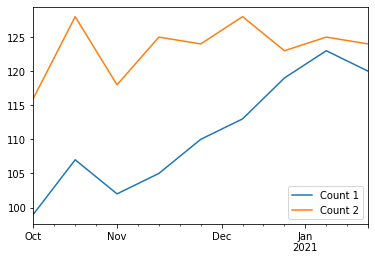

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()